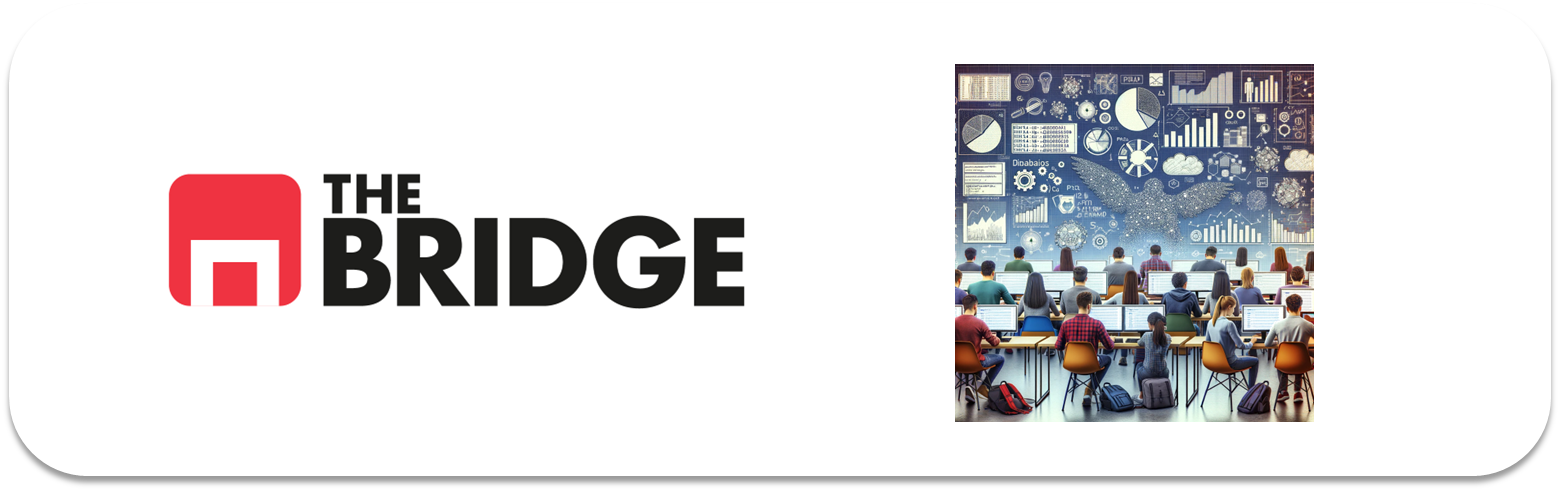

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [129]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics

In [130]:
# Importar datos
datos = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep='|')    

datos.sample(5)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


<Axes: xlabel='MEDV', ylabel='Count'>

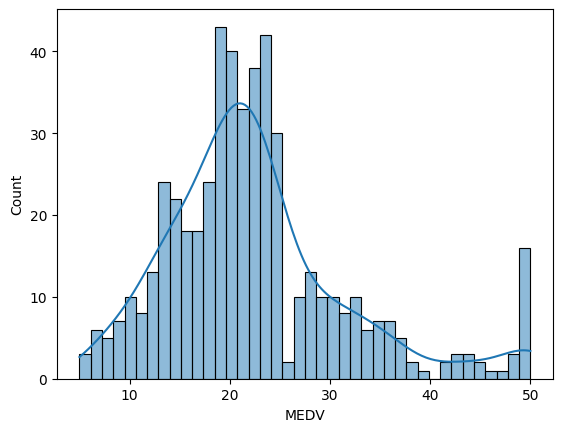

In [131]:
# Variable target
target = datos['MEDV']

# features
f_num = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']

# Distribucion variable target
sns.histplot(target, bins=40, kde=True)

In [132]:
# Split de datos
X = datos.drop('MEDV', axis=1)
y = datos['MEDV'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Mini EDA sobre las variables en X_train
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


In [134]:
X_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.630947,10.549020,11.737745,0.058824,0.547609,6.160833,68.648039,3.742949,10.313725,424.892157,18.999020,13.428235
std,7.459607,24.083242,6.722576,0.236456,0.108602,0.663825,28.890866,2.010749,9.161889,177.462472,1.800577,7.244601
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.561000,6.200000,1.169100,1.000000,188.000000,13.000000,2.880000
25%,0.087368,0.000000,6.102500,0.000000,0.448250,5.870250,43.800000,2.263950,4.000000,281.750000,18.400000,7.687500
50%,0.209885,0.000000,10.590000,0.000000,0.532000,6.170500,74.700000,3.353400,5.000000,345.000000,19.200000,12.335000
75%,4.522472,0.000000,18.100000,0.000000,0.621500,6.479250,95.225000,4.764825,24.000000,666.000000,20.200000,18.017500
max,45.746100,95.000000,27.740000,1.000000,0.871000,8.034000,100.000000,10.710300,24.000000,711.000000,22.000000,36.980000


In [135]:
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

<Axes: >

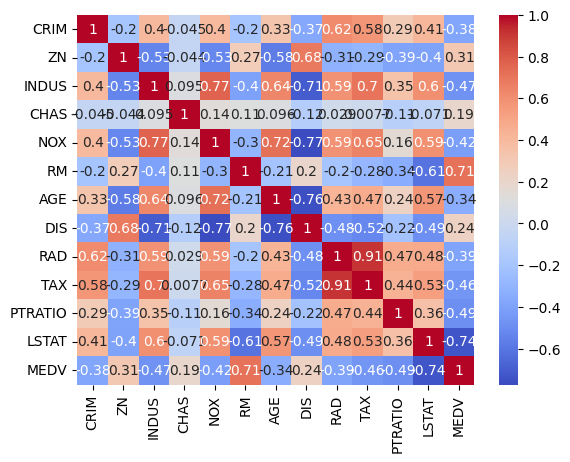

In [136]:
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

In [137]:
# Eliminar variables que están correlacionadas entre ellas con más de 0.4
final_vars = []
for var in f_num:
    if all(corr_matrix[var][final_vars].abs().max() < 0.7 for final_var in final_vars): # Seleccionar el umbral de correlación entre features
        final_vars.append(var)

# Variables no seleccionadas
not_selected_vars = [var for var in f_num if var not in final_vars]

# Mostrar los resultados
print("\nVariables seleccionadas:", final_vars)
print("\nVariables no seleccionadas:", not_selected_vars)


Variables seleccionadas: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']

Variables no seleccionadas: ['NOX', 'DIS', 'TAX']


In [138]:
final_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT','NOX','DIS']

X_train[final_vars].describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,LSTAT,NOX,DIS
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,6.315891,68.556436,9.356436,18.318317,12.457351,0.556484,3.808195
std,8.875058,23.152481,6.894618,0.258447,0.709452,27.994922,8.589721,2.228701,7.110381,0.117704,2.131226
min,0.009060,0.000000,0.740000,0.000000,3.863000,2.900000,1.000000,12.600000,1.730000,0.385000,1.129600
25%,0.081437,0.000000,5.130000,0.000000,5.890500,45.550000,4.000000,16.800000,6.772500,0.452000,2.087875
50%,0.261390,0.000000,8.560000,0.000000,6.210000,77.700000,5.000000,18.700000,10.925000,0.538000,3.175750
75%,3.202962,20.000000,18.100000,0.000000,6.636750,93.650000,12.000000,20.200000,16.372500,0.631000,5.400800
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,24.000000,22.000000,37.970000,0.871000,12.126500


In [139]:
df_var = X_train[final_vars].describe().loc[["std","mean"]].T 
df_var["CV"] = df_var["std"] / df_var["mean"]*100
df_var

,std,mean,CV
CRIM,8.875058,3.609125,245.906117
ZN,23.152481,11.569307,200.119860
INDUS,6.894618,10.985050,62.763646
CHAS,0.258447,0.071782,360.043350
RM,0.709452,6.315891,11.232805
AGE,27.994922,68.556436,40.834857
RAD,8.589721,9.356436,91.805485
PTRATIO,2.228701,18.318317,12.166516
LSTAT,7.110381,12.457351,57.077791
NOX,0.117704,0.556484,21.151451


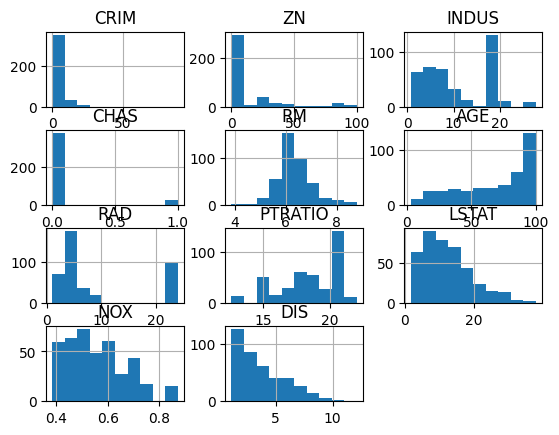

In [140]:
X_train[final_vars].hist();

In [141]:
X_train[final_vars].apply(lambda x: np.log(x + 1)).describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,LSTAT,NOX,DIS
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.808846,0.981533,2.284991,0.049756,1.985419,4.112460,2.038594,2.953927,2.459962,0.439664,1.480081
std,1.016988,1.634733,0.668017,0.179142,0.096270,0.589305,0.746965,0.121763,0.539900,0.073925,0.419192
min,0.009019,0.000000,0.553885,0.000000,1.581656,1.360977,0.693147,2.610070,1.004302,0.325700,0.755934
25%,0.078291,0.000000,1.813195,0.000000,1.930144,3.840525,1.609438,2.879198,2.050590,0.372941,1.127483
50%,0.232213,0.000000,2.257588,0.000000,1.975469,4.365643,1.791759,2.980619,2.478630,0.430483,1.429278
75%,1.435660,3.044522,2.949688,0.000000,2.032972,4.550185,2.452637,3.054001,2.854886,0.489193,1.856423
max,4.499545,4.615121,3.358290,0.693147,2.280339,4.615121,3.218876,3.135494,3.662792,0.626473,2.574633


In [142]:
df_var = X_train[final_vars].apply(lambda x: np.log(x + 1)).describe().loc[["std","mean"]].T 
df_var["CV"] = df_var["std"] / df_var["mean"]*100
df_var

,std,mean,CV
CRIM,1.016988,0.808846,125.733217
ZN,1.634733,0.981533,166.548965
INDUS,0.668017,2.284991,29.234998
CHAS,0.179142,0.049756,360.043350
RM,0.096270,1.985419,4.848834
AGE,0.589305,4.112460,14.329736
RAD,0.746965,2.038594,36.641171
PTRATIO,0.121763,2.953927,4.122064
LSTAT,0.539900,2.459962,21.947478
NOX,0.073925,0.439664,16.814054


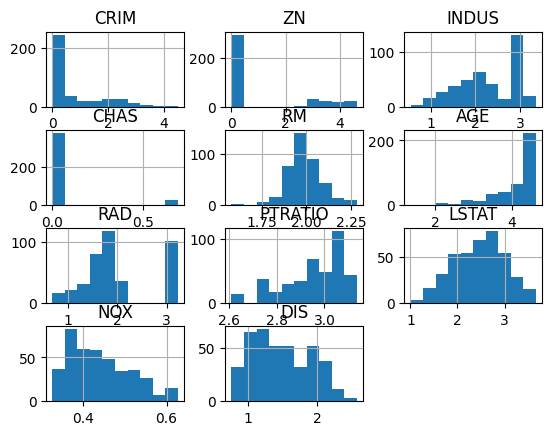

In [143]:
X_train[final_vars].apply(lambda x: np.log(x + 1)).hist();

#### Transformaciones logarítmicas a variables donde el CV disminuye:
* CRIM, INDUS, RM, AGE, RAD, PTRATIO,LSTAT


#### Posibles transformaciones adicionales - capar valores extremos:
* Reemplazar el valor 0 en la variable ZN
* Eliminar el valor máximo de la variable RAD (>3)

In [144]:
vars_log = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT','NOX','DIS']

# Transformación de variables
X_train[vars_log] = X_train[vars_log].apply(lambda x: np.log(x + 1))
X_test[vars_log] = X_test[vars_log].apply(lambda x: np.log(x + 1))

In [145]:
# Escalado de variables
std_scaler = StandardScaler() # seleccionamos el standar scaler por los valores extremos en las variables ZN  y RAD
min_max_scaler = MinMaxScaler()

pd.DataFrame(std_scaler.fit_transform(X_train[final_vars]),columns=final_vars).describe() # se escoge esta transformación por los valores extremos
# std_scaler.transform(X_test[final_vars])

X_train[final_vars] = std_scaler.fit_transform(X_train[final_vars])
X_test[final_vars] = std_scaler.fit_transform(X_test[final_vars])

In [146]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02
mean,-1.648846e-17,-1.066254e-16,7.914461e-17,1.319077e-17,-7.540723e-16,-1.143200e-16,-8.683923e-17,2.275408e-16,5.342261e-16,404.032178,-3.826972e-15,-1.011292e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,166.172655,1.001240e+00,1.001240e+00
min,-7.874414e-01,-6.011685e-01,-2.594623e+00,-2.780887e-01,-1.543515e+00,-4.199288e+00,-4.674823e+00,-1.729623e+00,-1.803452e+00,187.000000,-2.827498e+00,-2.699511e+00
25%,-7.192423e-01,-6.011685e-01,-7.071398e-01,-2.780887e-01,-9.036849e-01,-5.748833e-01,-4.620219e-01,-8.421793e-01,-5.752455e-01,279.000000,-6.144868e-01,-7.591761e-01
50%,-5.677040e-01,-6.011685e-01,-4.107306e-02,-2.780887e-01,-1.243438e-01,-1.034835e-01,4.301636e-01,-1.213428e-01,-3.308597e-01,330.000000,2.194785e-01,3.462001e-02
75%,6.171079e-01,1.263538e+00,9.962637e-01,-2.780887e-01,6.708274e-01,4.945698e-01,7.437045e-01,8.988911e-01,5.549886e-01,666.000000,8.228938e-01,7.323842e-01
max,3.633550e+00,2.225496e+00,1.608685e+00,3.595975e+00,2.530136e+00,3.067282e+00,8.540305e-01,2.614334e+00,1.582063e+00,711.000000,1.493001e+00,2.230640e+00


In [147]:
X_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,102.000000,1.020000e+02,1.020000e+02
mean,1.044916e-16,6.095342e-17,1.116754e-15,-8.163405e-18,3.156516e-16,-1.580163e-15,-6.966105e-16,5.409616e-16,2.993248e-17,424.892157,1.531999e-15,-1.051447e-15
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,177.462472,1.004938e+00,1.004938e+00
min,-7.897538e-01,-5.412677e-01,-3.110694e+00,-2.500000e-01,-1.505881e+00,-4.675112e+00,-3.611452e+00,-1.805922e+00,-1.855553e+00,188.000000,-3.681027e+00,-2.225175e+00
25%,-7.156242e-01,-5.412677e-01,-6.395080e-01,-2.500000e-01,-9.299581e-01,-3.871572e-01,-5.216263e-01,-7.571362e-01,-6.618007e-01,281.750000,-2.720550e-01,-7.074395e-01
50%,-6.135168e-01,-5.412677e-01,1.254872e-01,-2.500000e-01,-1.126444e-01,6.057302e-02,3.652317e-01,-1.792993e-02,-4.242703e-01,345.000000,1.502268e-01,9.942654e-02
75%,8.395306e-01,-5.412677e-01,9.058201e-01,-2.500000e-01,7.127498e-01,5.018369e-01,7.707501e-01,7.028302e-01,1.434991e+00,666.000000,6.551586e-01,7.678024e-01
max,2.883670e+00,2.384810e+00,1.544090e+00,4.000000e+00,2.793536e+00,2.478692e+00,8.526136e-01,2.521805e+00,1.434991e+00,711.000000,1.506765e+00,2.070243e+00


In [148]:
# construcción de modelos
# Modelo de regresión lineal
lr = LinearRegression() # Crear modelo
lr.fit(X_train[final_vars], y_train) # Entrenar modelo con datos de entrenamiento


LinearRegression()

In [149]:
# pesos de las features
coef_df = pd.DataFrame(lr.coef_, X_train[final_vars].columns, 
                      columns=['Coefficient'])

coef_df.sort_values(by='Coefficient', ascending=False)


,Coefficient
RM,1.742815
RAD,1.675064
CHAS,0.748220
AGE,0.250025
ZN,-0.019393
INDUS,-0.883872
PTRATIO,-1.830734
CRIM,-2.072044
NOX,-2.162184
DIS,-3.854945


In [150]:
# EVALUACIÓN DEL MODELO
# Predicciones
y_train_pred = lr.predict(X_train[final_vars])
y_test_pred = lr.predict(X_test[final_vars])

# Evaluación del modelo
print("Métricas de entrenamiento:")
print("MAE:", metrics.mean_absolute_error(y_train, y_train_pred))
print("MSE:", metrics.mean_squared_error(y_train, y_train_pred))   
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("R2:", metrics.r2_score(y_train, y_train_pred))

print("\nMétricas de test:")
print("MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R2:", metrics.r2_score(y_test, y_test_pred))

Métricas de entrenamiento:
MAE: 3.2620677209224085
MSE: 18.664648722610345
RMSE: 4.320260260980852
R2: 0.7851511751686486

Métricas de test:
MAE: 3.3119304686353743
MSE: 20.298135049078265
RMSE: 4.505345164255261
R2: 0.7232089471682879


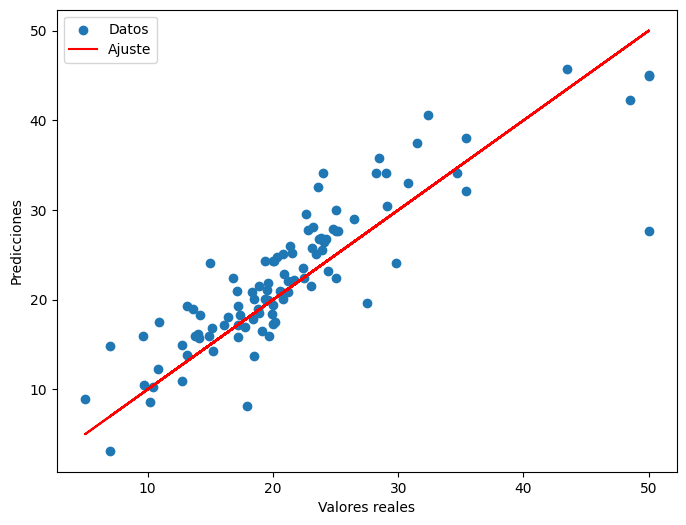

In [151]:
# Representación de las predicciones de test contra valores reales de test, y el ajuste perfecto
plt.figure(figsize=(8, 6))  # Asegurar un tamaño adecuado de la figura

# Generar el gráfico de dispersión
plt.scatter(y_test, y_test_pred, label="Datos")
plt.plot(y_test, y_test, label="Ajuste", color="red")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()


In [152]:
# Regularización Ridge

lr_Ridge = Ridge(alpha=10) # definimos el modelo Ridge con un alpha=10

lr_Ridge.fit(X_train[final_vars], y_train) # entrenamos el modelo Ridge

# Error de entrenamiento en el conjunto train
y_pred_train = lr_Ridge.predict(X_train[final_vars]) # predicciones sobre el conjunto de entrenamiento
print("MAE entrenamiento: ", metrics.mean_absolute_error(y_train, y_pred_train))
print("RMSE entrenamiento: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R2 entrenamiento: ", metrics.r2_score(y_train, y_pred_train))

# Error de test sobre el conjunto test
y_pred_test = lr_Ridge.predict(X_test[final_vars]) # predicciones sobre el conjunto de test
print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred_test))
print("RMSE test: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("R2 test: ", metrics.r2_score(y_test, y_pred_test))

MAE entrenamiento:  3.222933497405801
RMSE entrenamiento:  4.332797679161506
R2 entrenamiento:  0.783902380933009
MAE test:  3.2910967909436937
RMSE test:  4.512095396714294
R2 test:  0.7223789092601253


In [153]:
# Regularización Ridge, buscando el mejor alpha

# Inicialización de variables para almacenar el mejor resultado
best_alpha = None
best_r2_test = -np.inf  # Inicialmente el peor R2 posible
best_metrics = {}

# Bucle para probar valores de alpha de 0 a 100 en pasos de 5
for alpha in range(0, 105, 5):  # 105 porque el rango es exclusivo en el límite superior
    if alpha == 0:
        alpha = 0.0001  # Evitar alpha=0, que puede no ser válido para Ridge
    
    # Definir y entrenar el modelo Ridge
    lr_Ridge = Ridge(alpha=alpha)
    lr_Ridge.fit(X_train[final_vars], y_train)
    
    # Predicciones sobre el conjunto de entrenamiento
    y_pred_train = lr_Ridge.predict(X_train[final_vars])
    r2_train = metrics.r2_score(y_train, y_pred_train)
    
    # Predicciones sobre el conjunto de prueba
    y_pred_test = lr_Ridge.predict(X_test[final_vars])
    r2_test = metrics.r2_score(y_test, y_pred_test)
    
    # Actualizar si el modelo actual es mejor
    if r2_test > best_r2_test:
        best_r2_test = r2_test
        best_alpha = alpha
        best_metrics = {
            "MAE_train": metrics.mean_absolute_error(y_train, y_pred_train),
            "RMSE_train": np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
            "R2_train": r2_train,
            "MAE_test": metrics.mean_absolute_error(y_test, y_pred_test),
            "RMSE_test": np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
            "R2_test": r2_test
        }

# Imprimir las métricas del mejor modelo
print(f"Mejor alpha seleccionado: {best_alpha}")
print("Métricas para el mejor modelo:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value}")

Mejor alpha seleccionado: 0.0001
Métricas para el mejor modelo:
MAE_train: 3.2620671560624883
RMSE_train: 4.320260260982516
R2_train: 0.7851511751684832
MAE_test: 3.311929945341757
RMSE_test: 4.505345108947066
R2_test: 0.7232089539641329


In [154]:
# Regularización Lasso buscando el mejor alpha

# Inicialización de variables para almacenar el mejor resultado
best_alpha = None
best_r2_test = -np.inf  # Inicialmente el peor R² posible
best_metrics = {}

# Bucle para probar valores de alpha de 0 a 100 en pasos de 5
for alpha in range(0, 105, 5):  # 105 porque el rango es exclusivo en el límite superior
    if alpha == 0:
        alpha = 0.0001  # Evitar alpha=0, que no es válido para Lasso
    
    # Definir y entrenar el modelo Lasso
    lr_Lasso = Lasso(alpha=alpha, max_iter=10000)  # max_iter aumentado para asegurar convergencia
    lr_Lasso.fit(X_train[final_vars], y_train)
    
    # Predicciones sobre el conjunto de entrenamiento
    y_pred_train = lr_Lasso.predict(X_train[final_vars])
    r2_train = metrics.r2_score(y_train, y_pred_train)
    
    # Predicciones sobre el conjunto de prueba
    y_pred_test = lr_Lasso.predict(X_test[final_vars])
    r2_test = metrics.r2_score(y_test, y_pred_test)
    
    # Actualizar si el modelo actual es mejor
    if r2_test > best_r2_test:
        best_r2_test = r2_test
        best_alpha = alpha
        best_metrics = {
            "MAE_train": metrics.mean_absolute_error(y_train, y_pred_train),
            "RMSE_train": np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
            "R2_train": r2_train,
            "MAE_test": metrics.mean_absolute_error(y_test, y_pred_test),
            "RMSE_test": np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
            "R2_test": r2_test
        }

# Imprimir las métricas del mejor modelo
print(f"Mejor alpha seleccionado: {best_alpha}")
print("Métricas para el mejor modelo:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value}")

Mejor alpha seleccionado: 0.0001
Métricas para el mejor modelo:
MAE_train: 3.261983251657442
RMSE_train: 4.3202603072604235
R2_train: 0.7851511705656335
MAE_test: 3.3119179910639
RMSE_test: 4.505338384907249
R2_test: 0.7232097801617184
